In [9]:
import os
from tensorflow.keras.models import load_model,save_model
from PIL import Image
import glob
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import cv2
import numpy as np
import os

In [4]:
# Recreate the exact same model, including its weights and the optimizer
model = tf.keras.models.load_model('../raw_data/models/cnn/model_cnn_gender_01.h5')

# Show the model architecture
model.summary()

2022-06-03 11:34:16.293782: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-06-03 11:34:16.293947: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (DESKTOP-6091S0F): /proc/driver/nvidia/version does not exist
2022-06-03 11:34:16.308184: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 19, 26, 16)        1040      
                                                                 
 activation_1 (Activation)   (None, 19, 26, 16)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 19, 26, 32)        12832     
                                                                 
 activation_2 (Activation)   (None, 19, 26, 32)        0         
                                                                 
 global_average_pooling2d_1   (None, 32)               0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_1 (Dense)             (None, 512)               16896     
                                                        

In [6]:
image_list = []

for filename in glob.glob('../raw_data/data_cnn/Test/custom/*.jpg'): #assuming gif
    image = Image.open(filename)
    image = image.resize((178, 218)) #image.resize((256, 256))
    image_array = np.array(image)
    image_list.append(image_array)
    print(image_array.shape)

(218, 178, 3)
(218, 178, 3)
(218, 178, 3)
(218, 178, 3)


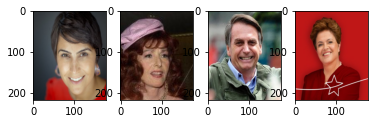

In [7]:
#plt.figure(figsize=(20,15))
for i in range(len(image_list)):
    plt.subplot(1,len(image_list),i+1)
    plt.imshow(image_list[i])

In [8]:
data_list=[]

img=cv2.imread('../raw_data/data_cnn/Test/custom/bolsonaro.jpg')
img=cv2.resize(img, (178,218)) # resize the image
#img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # cv2 creates bgr images, convert to rgb images
img=tf.keras.applications.vgg16.preprocess_input(img)   # apply the Vgg16 preprocess function
data_list.append(img)

data=np.array(data_list)/255 # convert to an np array and rescale images
print (data.shape)

model.predict(data )

NameError: name 'cv2' is not defined

In [10]:
img_path = '../raw_data/data_cnn/Test/custom/bolsonaro.jpg'
img=cv2.imread(img_path) # read image using cv2
img=cv2.resize(img, (178,218)) # resize the image

In [35]:
import cv2
import numpy as np
import os
data_list=[]
dir=r'../raw_data/data_cnn/Test/custom/bolsonaro.jpg'
test_list=os.listdir(dir) # create a list of the files in the directory
batch_size=len(test_list) # determine number of files to process
for f in test_list:  # iterate through the files
    fpath=os.path.join (dir, f) # create path to the image file
    img=cv2.imread(fpath) # read image using cv2
    img=cv2.resize(img, (178,218)) # resize the image
    #img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR) # cv2 creates bgr images, convert to rgb images
    #img=tf.keras.applications.vgg16.preprocess_input(img)   # apply the Vgg16 preprocess function
    data_list.append(img)  # append processed image to the list
data=np.array(data_list)/255 # convert to an np array and rescale images
print (data.shape, batch_size)
predictions=model.predict(data,batch_size=batch_size, verbose=0 )
trials=len (predictions)
for i in range(0,trials):
    predicted_class=predictions[i].argmax() # get index of highest probability
    print (test_list[i], predicted_class) # print file name and class prediction

NotADirectoryError: [Errno 20] Not a directory: '../raw_data/data_cnn/Test/custom/bolsonaro.jpg'